#### Module 13: Time Series Analysis

#### Case Study–1

Domain – SEA Transportation

focus – forecast demand

Business challenge/requirement

SeaPort is the largest operator of Sea Planes across sea shores in Europe. SeaPort doesn't have planes of their own, rather they lease them on a short-term basis based on passenger traffic. You as an ML expert have to build a model to forecast the demand (passenger traffic) of traffic.

Key issues

As of now, utilization of Planes is low due to poor forecasts of traffic

Considerations

NONE

Data volume

- Approx 144 records – data month-wise for last 12 years – file SeaPlaneTravel.csv

Fields in Data

• Month: Month in which traffic data was recorded

• '#Passenger': No of travelers availing Service in that month


Additional information

- NA

Business benefits

Better utilization of planes will lead to a decrease in cost and hence better bottom line

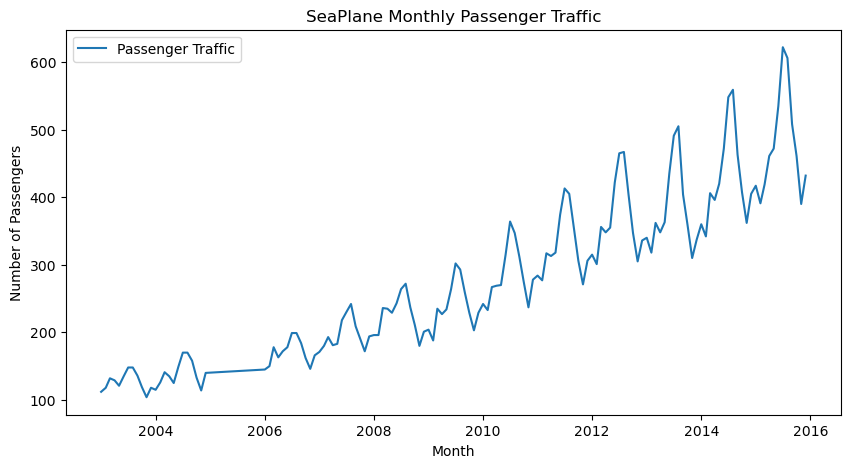

C:\Users\tando\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\tando\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\tando\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\tando\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\tando\a

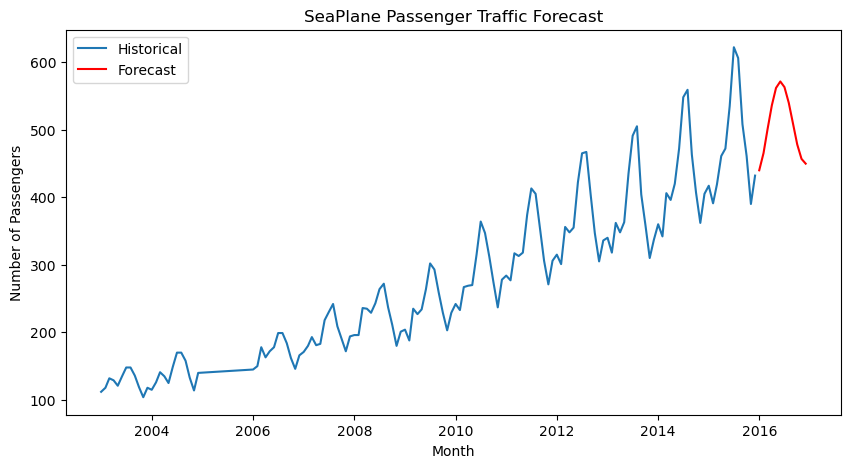

Forecasted Passenger Traffic for next 12 months:
144    439.855314
145    465.297241
146    500.666670
147    535.971621
148    561.688716
149    571.311700
150    562.970771
151    539.727739
152    508.527168
153    478.147204
154    456.748176
155    449.698609
Name: predicted_mean, dtype: float64


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# Load dataset
df = pd.read_csv("SeaPlaneTravel.csv")

# Parse Month column as datetime
df['Month'] = pd.to_datetime(df['Month'])
df.set_index('Month', inplace=True)

# Plot the passenger traffic
plt.figure(figsize=(10,5))
plt.plot(df['#Passengers'], label='Passenger Traffic')
plt.title("SeaPlane Monthly Passenger Traffic")
plt.xlabel("Month")
plt.ylabel("Number of Passengers")
plt.legend()
plt.show()

#  Fit ARIMA model 
model = ARIMA(df['#Passengers'], order=(2,1,2))
model_fit = model.fit()

# Forecast next 12 months
forecast = model_fit.forecast(steps=12)

# Plot forecast
plt.figure(figsize=(10,5))
plt.plot(df['#Passengers'], label='Historical')
plt.plot(pd.date_range(df.index[-1], periods=12, freq='M'), forecast, label='Forecast', color='red')
plt.title("SeaPlane Passenger Traffic Forecast")
plt.xlabel("Month")
plt.ylabel("Number of Passengers")
plt.legend()
plt.show()

# Print forecasted values
print("Forecasted Passenger Traffic for next 12 months:")
print(forecast)